## 문제 정의
- Kaggle titanic 머신 러닝

## 데이터 수집

In [1]:
import pandas as pd
titanic = pd.read_csv("./data/titanic/train.csv",index_col='PassengerId')
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


## 데이터 전처리

### 문자형 데이터를 정수형으로 변환

In [2]:
titanic['Embarked'] = titanic['Embarked'].map({'S':1,'C':2,'Q':3})
titanic['Sex'] = titanic['Sex'].map({'male':1,'female':2})
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,1.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,2.0
3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,1.0
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,1.0
888,1,1,"Graham, Miss. Margaret Edith",2,19.0,0,0,112053,30.0000,B42,1.0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",2,NaN,1,2,W./C. 6607,23.4500,NaN,1.0


In [3]:
for i in range(891):
    if (pd.notnull(titanic['Cabin'].iloc[i])):
        titanic['Cabin'].iloc[i] = titanic['Cabin'].iloc[i][0]

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
titanic['Cabin'][pd.notnull(titanic['Cabin'])].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [5]:
titanic['Cabin'] = titanic['Cabin'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8})

In [6]:
titanic['Cabin'][pd.notnull(titanic['Cabin'])].value_counts()

3.0    59
2.0    47
4.0    33
5.0    32
1.0    15
6.0    13
7.0     4
8.0     1
Name: Cabin, dtype: int64

### 불필요한 열 제거

In [7]:
del titanic['Name']
del titanic['Ticket']
del titanic['Embarked']
del titanic['SibSp']
del titanic['Parch']
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,,
1,0,3,1,22.0,7.2500,NaN
2,1,1,2,38.0,71.2833,3.0
3,1,3,2,26.0,7.9250,NaN
4,1,1,2,35.0,53.1000,3.0
5,0,3,1,35.0,8.0500,NaN
...,...,...,...,...,...,...
887,0,2,1,27.0,13.0000,NaN
888,1,1,2,19.0,30.0000,2.0
889,0,3,2,NaN,23.4500,NaN


### 결측지 확인

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     204 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 48.7 KB


### 결측지 제거

In [9]:
titanic['Age'][titanic['Sex']==1].sum()//titanic['Age'][titanic['Sex']==1].count()

30.0

In [10]:
titanic['Age'][titanic['Sex']==2].sum()//titanic['Age'][titanic['Sex']==2].count()

27.0

In [11]:
for i in range(891):
    if (pd.isnull(titanic.iloc[i]['Age'])):
        if (titanic.iloc[i]['Sex']==1):
            titanic['Age'].iloc[i] = titanic['Age'][titanic['Sex']==1].sum()//titanic['Age'][titanic['Sex']==1].count()
        else:
            titanic['Age'].iloc[i] = titanic['Age'][titanic['Sex']==2].sum()//titanic['Age'][titanic['Sex']==2].count()

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
titanic[pd.isnull(titanic['Age'])]

,Survived,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,,


In [13]:
titanic['Cabin'][pd.isnull(titanic['Cabin'])]=0

C:\Users\smhrd\AppData\Local\Temp/ipykernel_11844/3917771703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Cabin'][pd.isnull(titanic['Cabin'])]=0


In [14]:
titanic[pd.isnull(titanic['Cabin'])]

,Survived,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,,


In [15]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   Fare      891 non-null    float64
 5   Cabin     891 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 48.7 KB


### 이상치 확인

In [16]:
titanic.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.580438,32.204208,0.776655
std,0.486592,0.836071,0.477990,13.018631,49.693429,1.590899
min,0.000000,1.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,22.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,30.000000,14.454200,0.000000
75%,1.000000,3.000000,2.000000,35.000000,31.000000,0.000000
max,1.000000,3.000000,2.000000,80.000000,512.329200,8.000000


### 이상치 제거

In [17]:
titanic['Age'] = titanic['Age']//1
titanic

,Survived,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,,
1,0,3,1,22.0,7.2500,0.0
2,1,1,2,38.0,71.2833,3.0
3,1,3,2,26.0,7.9250,0.0
4,1,1,2,35.0,53.1000,3.0
5,0,3,1,35.0,8.0500,0.0
...,...,...,...,...,...,...
887,0,2,1,27.0,13.0000,0.0
888,1,1,2,19.0,30.0000,2.0
889,0,3,2,27.0,23.4500,0.0


array([[<AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>]], dtype=object)

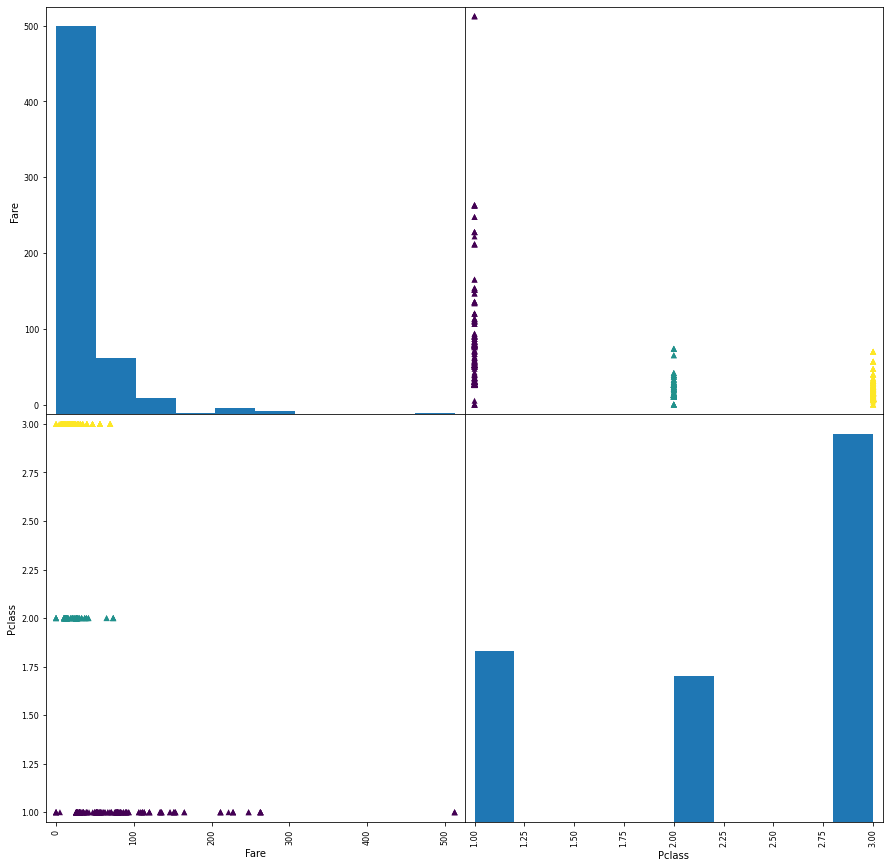

In [18]:
pd.plotting.scatter_matrix(titanic[['Fare','Pclass']],figsize=(15,15),marker="^",c = titanic['Pclass'],alpha = 1)

In [19]:
titanic['Fare'][titanic['Fare']<8]=8

C:\Users\smhrd\AppData\Local\Temp/ipykernel_11844/637036922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Fare'][titanic['Fare']<8]=8


In [20]:
titanic['Fare'][titanic['Fare']>=100]=100

C:\Users\smhrd\AppData\Local\Temp/ipykernel_11844/1647448698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Fare'][titanic['Fare']>=100]=100


In [21]:
titanic[['Pclass','Fare']]

,Pclass,Fare
PassengerId,,
1,3,8.0000
2,1,71.2833
3,3,8.0000
4,1,53.1000
5,3,8.0500
...,...,...
887,2,13.0000
888,1,30.0000
889,3,23.4500


In [22]:
titanic.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,1.352413,29.564534,27.270412,0.776655
std,0.486592,0.836071,0.477990,13.027414,27.103531,1.590899
min,0.000000,1.000000,1.000000,0.000000,8.000000,0.000000
25%,0.000000,2.000000,1.000000,22.000000,8.000000,0.000000
50%,0.000000,3.000000,1.000000,30.000000,14.454200,0.000000
75%,1.000000,3.000000,2.000000,35.000000,31.000000,0.000000
max,1.000000,3.000000,2.000000,80.000000,100.000000,8.000000


## 데이터셋 구성하기

### 문제와 정답으로 분리

In [23]:
X = titanic[['Pclass','Sex','Age','Fare','Cabin']]
X

,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,
1,3,1,22.0,8.0000,0.0
2,1,2,38.0,71.2833,3.0
3,3,2,26.0,8.0000,0.0
4,1,2,35.0,53.1000,3.0
5,3,1,35.0,8.0500,0.0
...,...,...,...,...,...
887,2,1,27.0,13.0000,0.0
888,1,2,19.0,30.0000,2.0
889,3,2,27.0,23.4500,0.0


In [24]:
y = titanic['Survived']
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
XTrain, XTest, yTrain, yTest = train_test_split(X,y,test_size = 0.3,random_state = 2)

In [26]:
XTrain, XTest, yTrain, yTest

(             Pclass  Sex   Age      Fare  Cabin
 PassengerId                                    
 452               3    1  30.0   19.9667    0.0
 346               2    2  24.0   13.0000    6.0
 688               3    1  19.0   10.1708    0.0
 280               3    2  35.0   20.2500    0.0
 743               1    2  21.0  100.0000    2.0
 ...             ...  ...   ...       ...    ...
 535               3    2  30.0    8.6625    0.0
 585               3    1  30.0    8.7125    0.0
 494               1    1  71.0   49.5042    0.0
 528               1    1  30.0  100.0000    3.0
 169               1    1  30.0   25.9250    0.0
 
 [623 rows x 5 columns],
              Pclass  Sex   Age     Fare  Cabin
 PassengerId                                   
 708               1    1  42.0  26.2875    5.0
 38                3    1  21.0   8.0500    0.0
 616               2    2  24.0  65.0000    0.0
 170               3    1  28.0  56.4958    0.0
 69                3    2  17.0   8.0000    0.0


## 모델 선택 및 하이퍼 파라미터 튜닝

### 모델 선택

In [27]:
from sklearn.neighbors import KNeighborsClassifier

### 하이퍼 파라미터 튜닝

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
parameterGrid = {
    'n_neighbors' : range(1,51),
    'p' : [1,2],
    'weights' : ['uniform','distance']
}

In [30]:
grid = GridSearchCV(KNeighborsClassifier(), parameterGrid, cv = 5)

In [31]:
grid.fit(XTrain,yTrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 51), 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [32]:
grid.best_score_

0.7512774193548386

In [33]:
grid.best_params_

{'n_neighbors': 14, 'p': 1, 'weights': 'distance'}

## 학습 및 평가

In [34]:
scoreList = []
for i in range(1,51):
    knn_model = KNeighborsClassifier(n_neighbors=i,p=1, weights='distance')
    knn_model.fit(XTrain,yTrain)
    scoreList.append([knn_model.score(XTrain,yTrain),knn_model.score(XTest,yTest)])
df_scoreList = pd.DataFrame(scoreList,columns=['TrainScore','TestScore'],index=range(1,51))
df_scoreList.index.name = "neighbors"
df_scoreList

,TrainScore,TestScore
neighbors,,
1,0.969502,0.720149
2,0.969502,0.716418
3,0.966292,0.701493
4,0.971108,0.712687
5,0.971108,0.727612
6,0.971108,0.738806
7,0.971108,0.727612
8,0.971108,0.735075
9,0.971108,0.735075


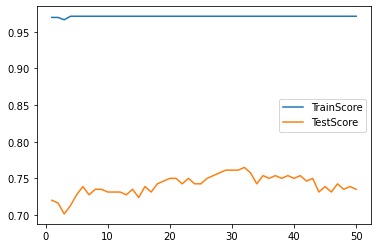

In [35]:
import matplotlib.pyplot as plt
plt.plot(df_scoreList, label = df_scoreList.columns)
plt.legend()
plt.show()

## TestData 불러오기

In [36]:
test = pd.read_csv("./data/titanic/test.csv",index_col="PassengerId")
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


## TestData 전처리

### 문자형 데이터 숫자형으로 변환

In [37]:
test['Embarked'] = test['Embarked'].map({'S':1,'C':2,'Q':3})
test['Sex'] = test['Sex'].map({'male':1,'female':2})
test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,3
893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,1
894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,3
895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,1
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",1,NaN,0,0,A.5. 3236,8.0500,NaN,1
1306,1,"Oliva y Ocana, Dona. Fermina",2,39.0,0,0,PC 17758,108.9000,C105,2
1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1


In [38]:
for i in range(418):
    if (pd.notnull(test['Cabin'].iloc[i])):
        test['Cabin'].iloc[i] = test['Cabin'].iloc[i][0]

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [39]:
test['Cabin'].value_counts()

C    35
B    18
D    13
E     9
F     8
A     7
G     1
Name: Cabin, dtype: int64

In [40]:
test['Cabin'] = test['Cabin'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'T':8})

### 불필요한 열 제거

In [41]:
del test['Name']
del test['Ticket']
del test['Embarked']
del test['SibSp']
del test['Parch']
test

,Pclass,Sex,Age,Fare,Cabin
PassengerId,,,,,
892,3,1,34.5,7.8292,NaN
893,3,2,47.0,7.0000,NaN
894,2,1,62.0,9.6875,NaN
895,3,1,27.0,8.6625,NaN
896,3,2,22.0,12.2875,NaN
...,...,...,...,...,...
1305,3,1,NaN,8.0500,NaN
1306,1,2,39.0,108.9000,3.0
1307,3,1,38.5,7.2500,NaN


### 결측지 확인

In [42]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     332 non-null    float64
 3   Fare    417 non-null    float64
 4   Cabin   91 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 19.6 KB


In [43]:
test['Age'][test['Sex']==1].sum()//test['Age'][test['Sex']==1].count()

30.0

In [44]:
test['Age'][test['Sex']==2].sum()//test['Age'][test['Sex']==2].count()

30.0

In [45]:
for i in range(418):
    if (pd.isnull(test.iloc[i]['Age'])):
        if (test.iloc[i]['Sex']==1):
            test['Age'].iloc[i] = test['Age'][test['Sex']==1].sum()//test['Age'][test['Sex']==1].count()
        else:
            test['Age'].iloc[i] = test['Age'][test['Sex']==2].sum()//test['Age'][test['Sex']==2].count()

C:\Users\smhrd\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [46]:
test['Fare'][pd.isnull(test['Fare'])]=8.0000

C:\Users\smhrd\AppData\Local\Temp/ipykernel_11844/1672224348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][pd.isnull(test['Fare'])]=8.0000


In [47]:
test['Cabin'][pd.isnull(test['Cabin'])]=0

C:\Users\smhrd\AppData\Local\Temp/ipykernel_11844/1678956821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Cabin'][pd.isnull(test['Cabin'])]=0


In [48]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   Fare    418 non-null    float64
 4   Cabin   418 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 19.6 KB


### 이상치 확인

In [49]:
test.describe()

,Pclass,Sex,Age,Fare,Cabin
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,1.363636,30.216507,35.561095,0.717703
std,0.841838,0.481622,12.635016,55.856848,1.508321
min,1.000000,1.000000,0.170000,0.000000,0.000000
25%,1.000000,1.000000,23.000000,7.895800,0.000000
50%,3.000000,1.000000,30.000000,14.454200,0.000000
75%,3.000000,2.000000,35.750000,31.471875,0.000000
max,3.000000,2.000000,76.000000,512.329200,7.000000


### 이상치 제거

In [50]:
test['Age'] = test['Age']//1

array([[<AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Fare', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>]], dtype=object)

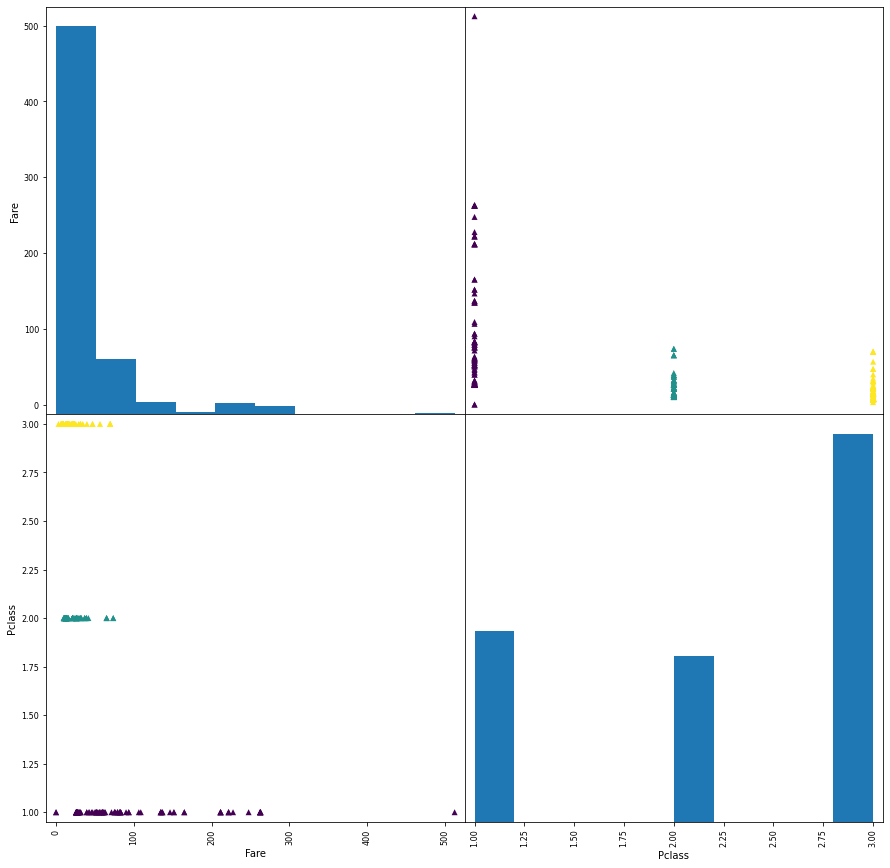

In [51]:
pd.plotting.scatter_matrix(test[['Fare','Pclass']],figsize=(15,15),marker="^",c = test['Pclass'],alpha = 1)

In [52]:
test['Fare'][test['Fare']<8]=8

C:\Users\smhrd\AppData\Local\Temp/ipykernel_11844/1087081510.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][test['Fare']<8]=8


In [53]:
test['Fare'][test['Fare']>=100]=100

C:\Users\smhrd\AppData\Local\Temp/ipykernel_11844/3429829823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Fare'][test['Fare']>=100]=100


In [54]:
test[['Pclass','Fare']]

,Pclass,Fare
PassengerId,,
892,3,8.0000
893,3,8.0000
894,2,9.6875
895,3,8.6625
896,3,12.2875
...,...,...
1305,3,8.0500
1306,1,100.0000
1307,3,8.0000


In [55]:
test.describe()

,Pclass,Sex,Age,Fare,Cabin
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,1.363636,30.191388,27.932206,0.717703
std,0.841838,0.481622,12.654104,28.137455,1.508321
min,1.000000,1.000000,0.000000,8.000000,0.000000
25%,1.000000,1.000000,23.000000,8.000000,0.000000
50%,3.000000,1.000000,30.000000,14.454200,0.000000
75%,3.000000,2.000000,35.750000,31.471875,0.000000
max,3.000000,2.000000,76.000000,100.000000,7.000000


## 예측

### 모델 생성

In [56]:
knn_model = KNeighborsClassifier(n_neighbors=33,p=1, weights='distance')

### 학습

In [57]:
knn_model.fit(X,y)

KNeighborsClassifier(n_neighbors=33, p=1, weights='distance')

### 예측

In [58]:
result = knn_model.predict(test)
result

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

## csv로 내보내기

In [59]:
dfResult = pd.DataFrame(result,columns=['result'])
dfResult

,result
0,0
1,0
2,0
3,1
4,0
...,...
413,0
414,1
415,0
416,0


In [60]:
dfResult.to_csv("./data/titanic/result.csv",encoding="euc-kr")